## Diffusion-Limited Aggregation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib notebook

In [2]:
np.random.seed(0)

<IPython.core.display.Javascript object>


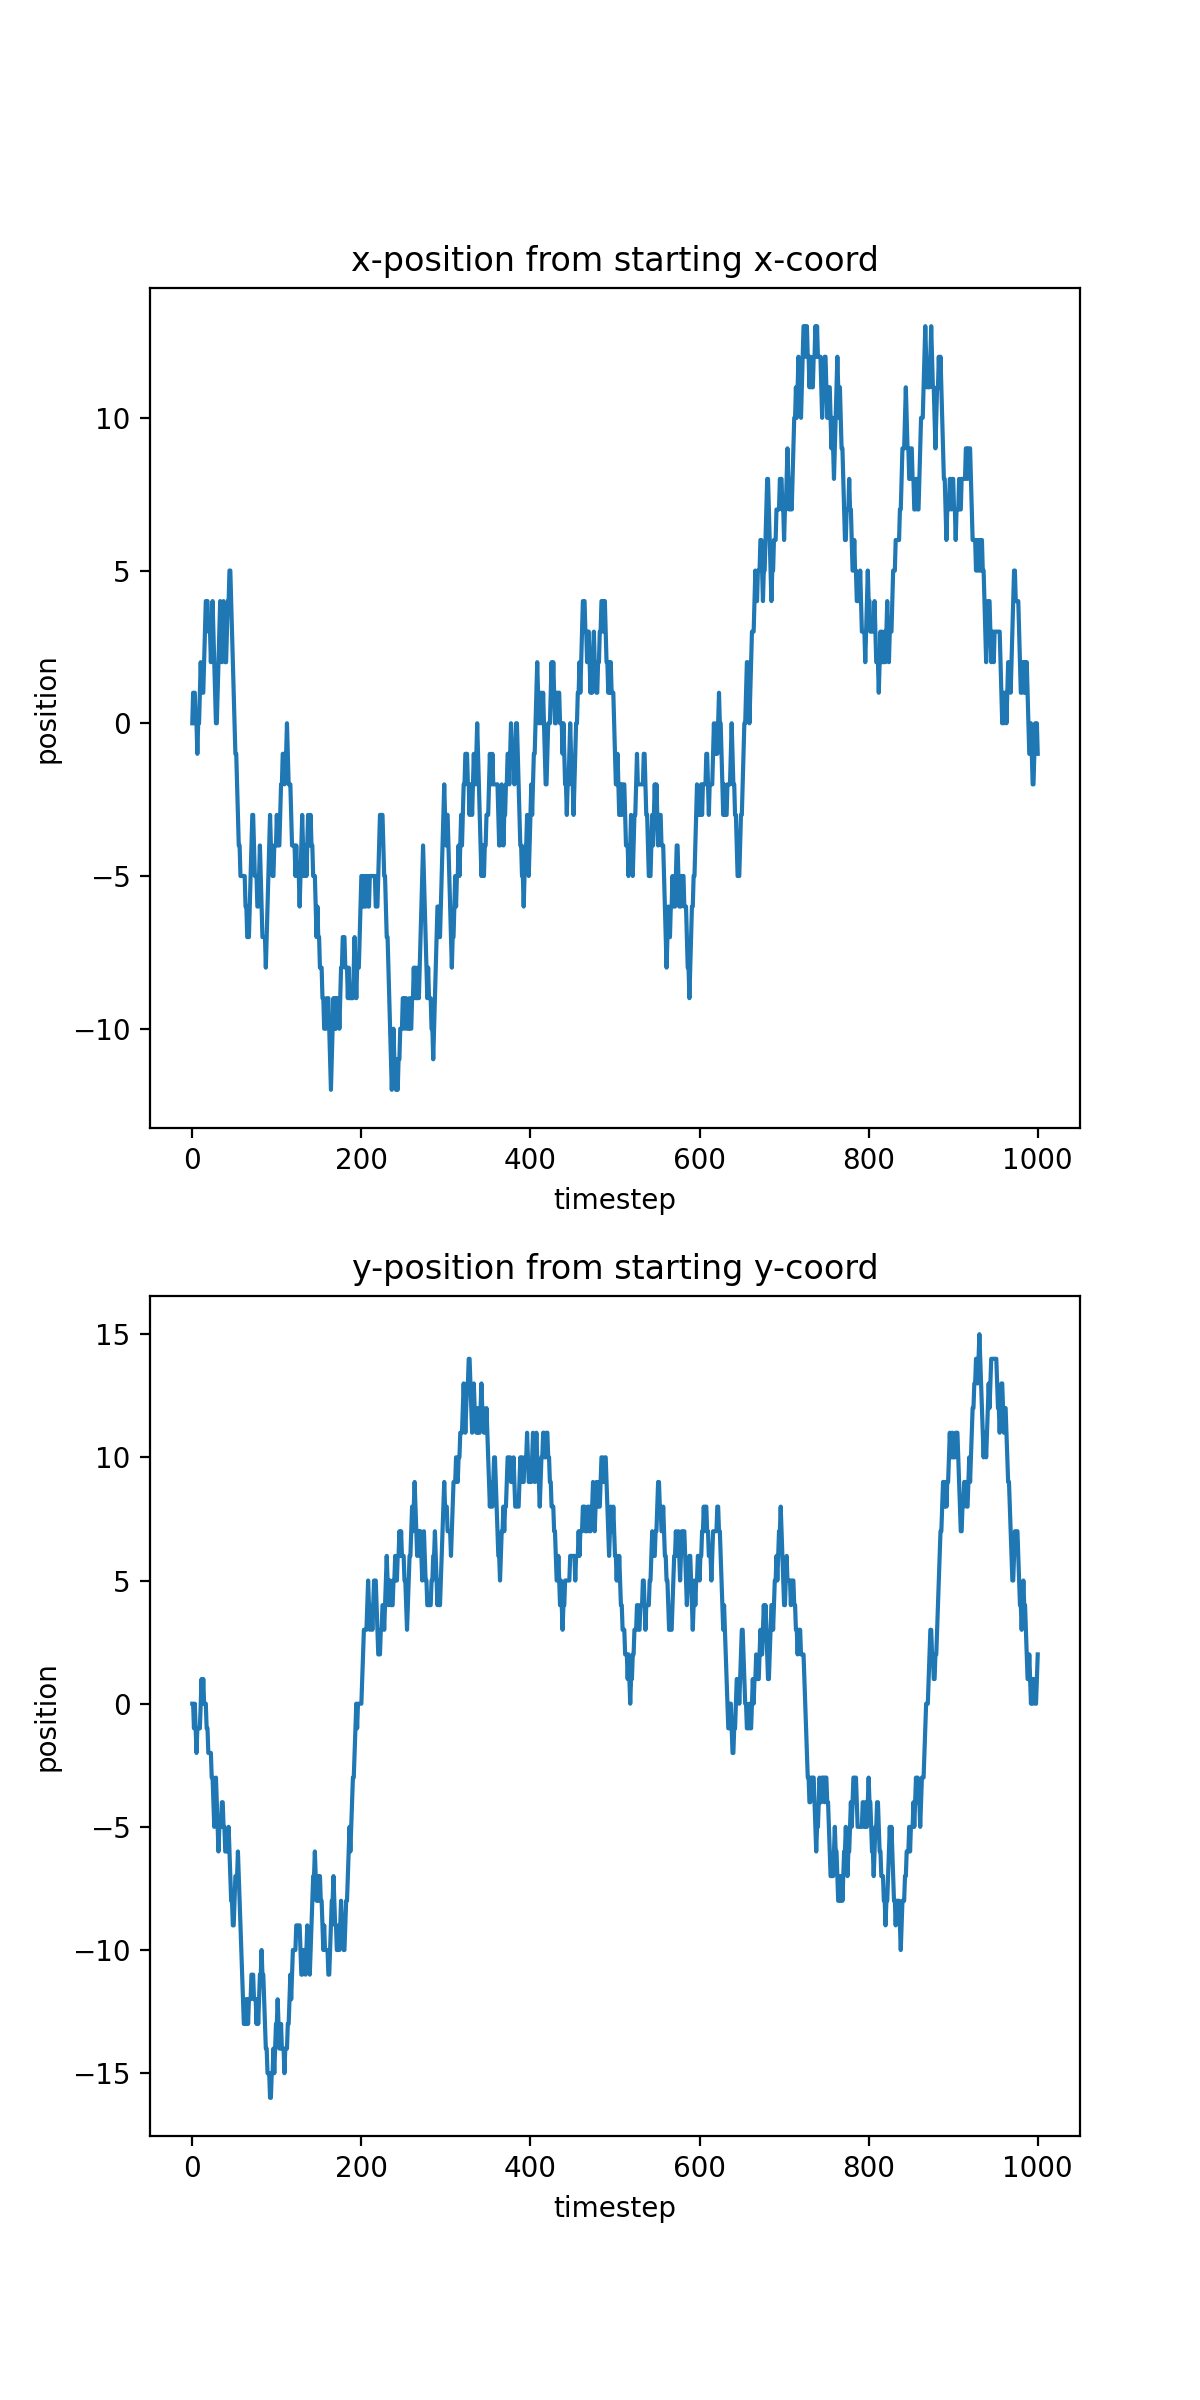

Text(0.5, 1.0, 'y-position from starting y-coord')

In [3]:
n = 200
N = 10**4
steps = 1000

x1 = np.random.randint(0, n, size=N)
y1 = np.random.randint(0, n, size=N)
x_dis = [0]
y_dis = [0]


def evolve(x, y, dx=None, dy=None):
    x_update = np.random.choice((-1,0,1), size=len(x))
    y_update = np.random.choice((-1,0,1), size=len(y))
    x += x_update
    y += y_update
    x %= n
    y %= n
    if dx != None and dy != None:
        dx.append(dx[i] + x_update[0])
        dy.append(dy[i] + y_update[0])
    
for i in range(steps):
    evolve(x1, y1, x_dis, y_dis)

# Plotting
plt.figure(figsize=(6, 12))
plt.subplot(2,1,1)
plt.plot(range(steps+1), x_dis)
plt.xlabel('timestep')
plt.ylabel('position')
plt.title('x-position from starting x-coord')

plt.subplot(2,1,2)
plt.plot(range(steps+1), y_dis)
plt.xlabel('timestep')
plt.ylabel('position')
plt.title('y-position from starting y-coord')

Shown above are plots of the x and y positions with respect to the starting coordinates evolving in time. A single particle is singled out for better visualization. In both directions, the position seems to wander around the starting coordinates. Occasionally, the particle goes more than 15 units away from its initial position, but it always comes back. This behavior is expected since with each iteration, the probability of the particle moving to one of the eight neighboring squares or staying in the same square is the same. Therefore, for a large number of timestep, the particle should stay close to the initial position.

The trajectory of all $10^4$ particles is animated below.

<IPython.core.display.Javascript object>


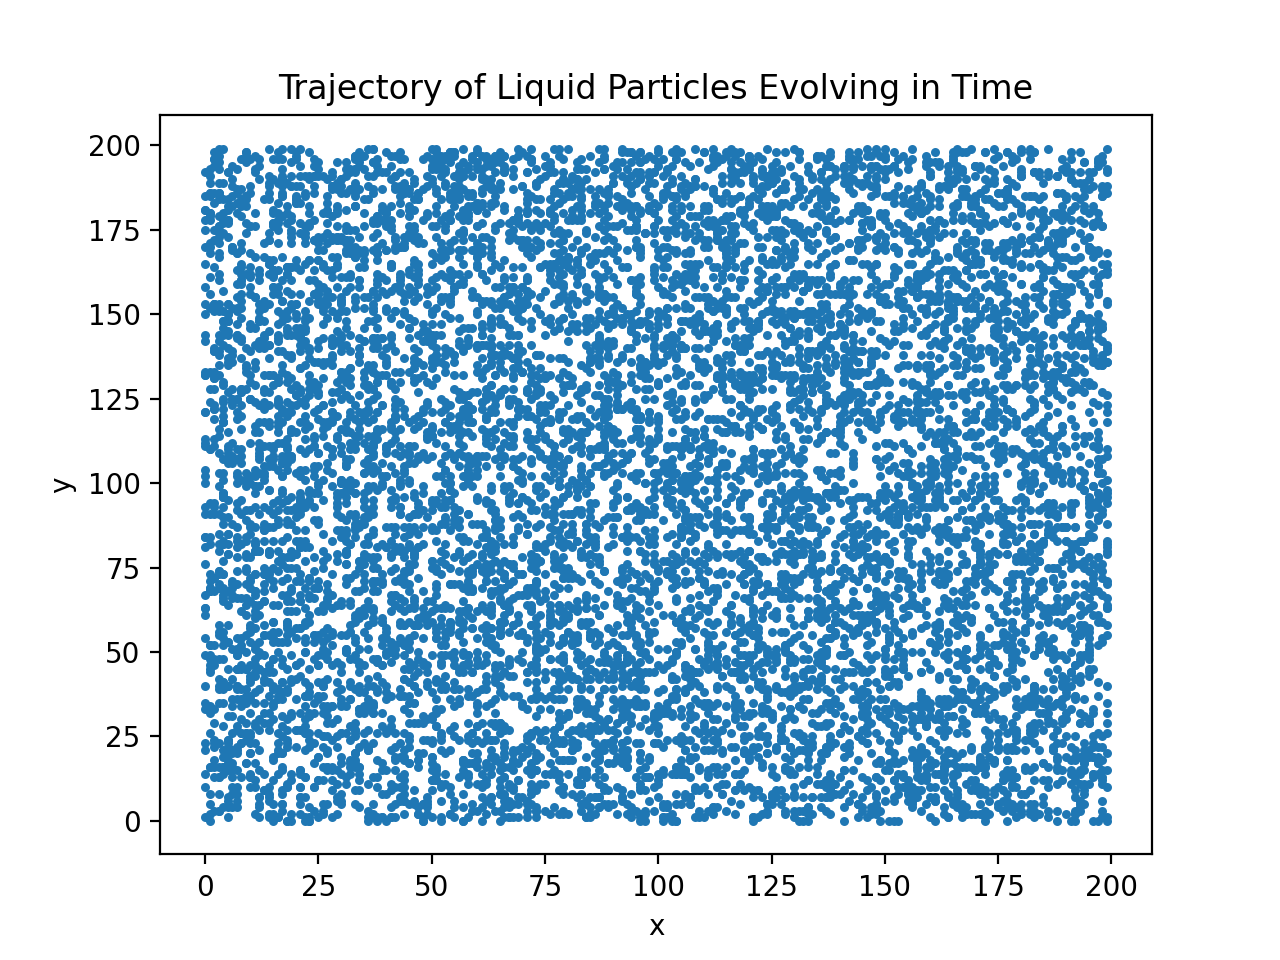

In [4]:
x_plot = np.random.randint(0, 200, size=N)
y_plot = np.random.randint(0, 200, size=N)

def update(frame):
    global x_plot, y_plot
    x_plot += np.random.choice((-1,0,1), size=N)
    y_plot += np.random.choice((-1,0,1), size=N)
    x_plot %= 200
    y_plot %= 200
    scat.set_offsets(np.column_stack((x_plot, y_plot)))
    return scat


fig = plt.figure()
scat = plt.scatter(x_plot, y_plot, s=5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Trajectory of Liquid Particles Evolving in Time')
ani = FuncAnimation(fig=fig, func=update, frames=50, interval=100, repeat=False)

<IPython.core.display.Javascript object>


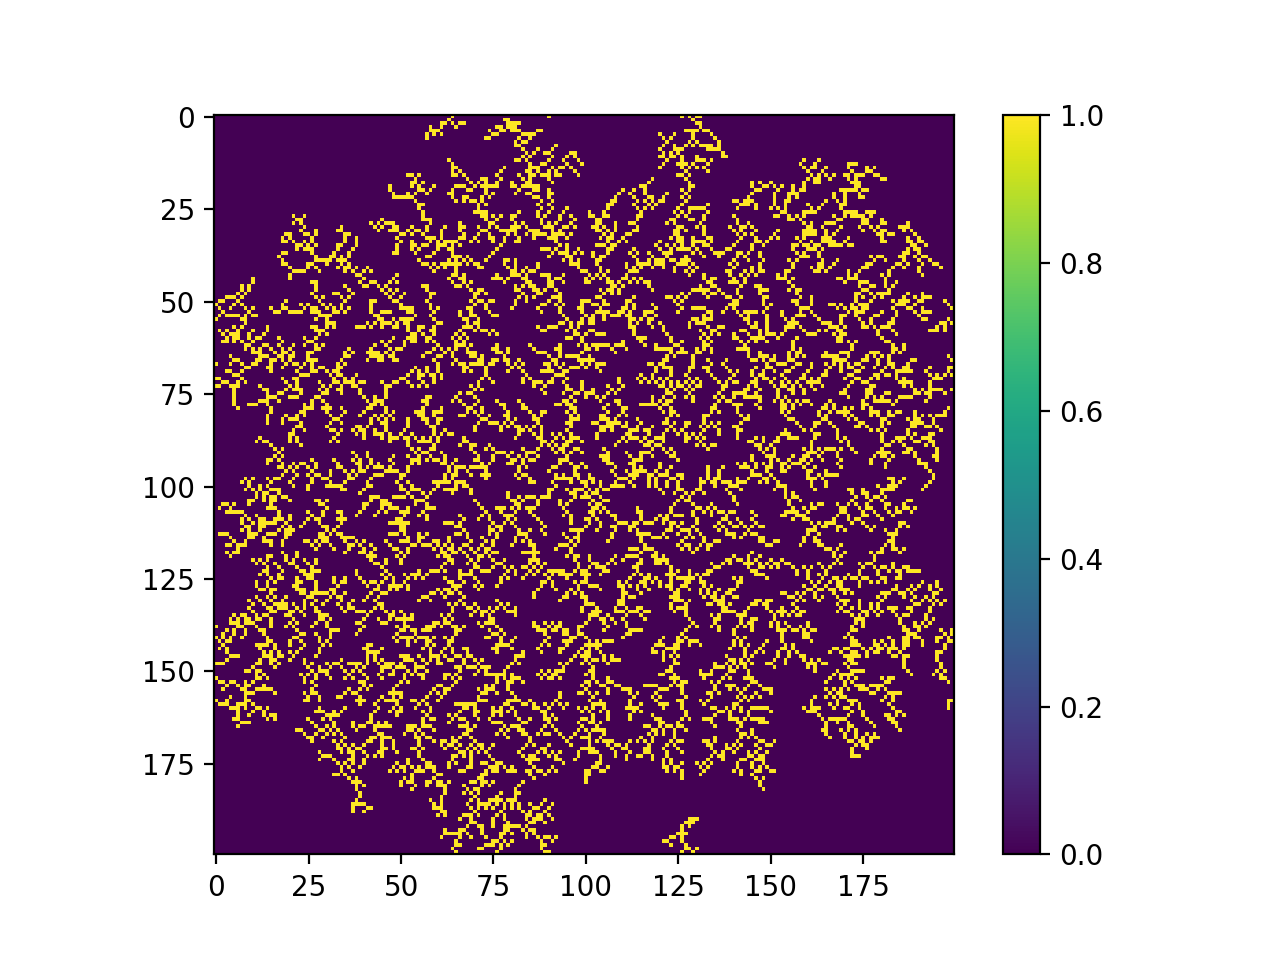

In [5]:
solid_grid = np.zeros((n,n))
solid_grid[n//2][n//2] = 1  # Initial solid particle
solid_count = [1]

x2 = np.random.randint(0, n, size=N)
y2 = np.random.randint(0, n, size=N)

def neighbors(x, y):
    res = []
    x_coords = [(x-1)%n, x, (x+1)%n]
    y_coords = [(y-1)%n, y, (y+1)%n]
    for i in x_coords:
        for j in y_coords:
            res.append([i, j])
    return res

def solidify(x, y, grid):
    pointer = 0
    removed = 0
    flag = True
    while pointer < len(x):
        x_curr, y_curr = x[pointer], y[pointer]
        for point in neighbors(x_curr, y_curr):
            if grid[point[0]][point[1]] == 1:
                grid[x_curr][y_curr] = 1
                x = np.delete(x, pointer)
                y = np.delete(y, pointer)
                removed += 1
                flag = False
                break
                
        if flag:
            pointer += 1
        else:
            flag = True
    return removed, x, y
    
while solid_count[-1] / N < 0.8:
    evolve(x2, y2)
    new_solids, x2, y2 = solidify(x2, y2, solid_grid)
    solid_count.append(solid_count[-1] + new_solids)

plt.imshow(solid_grid)
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>


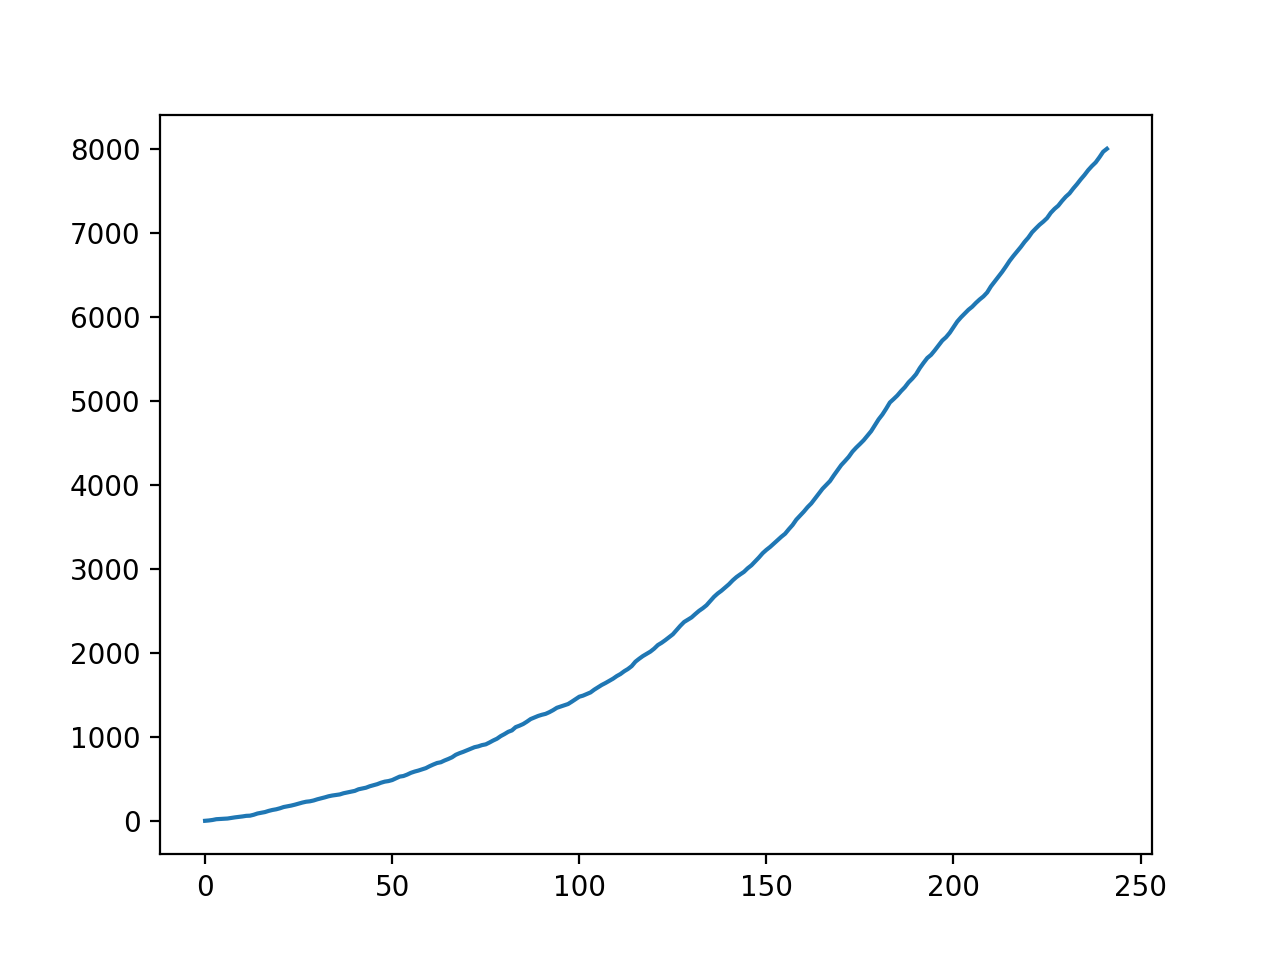

In [6]:
times = range(len(solid_count))
plt.plot(times, solid_count)
# plt.loglog()

<IPython.core.display.Javascript object>


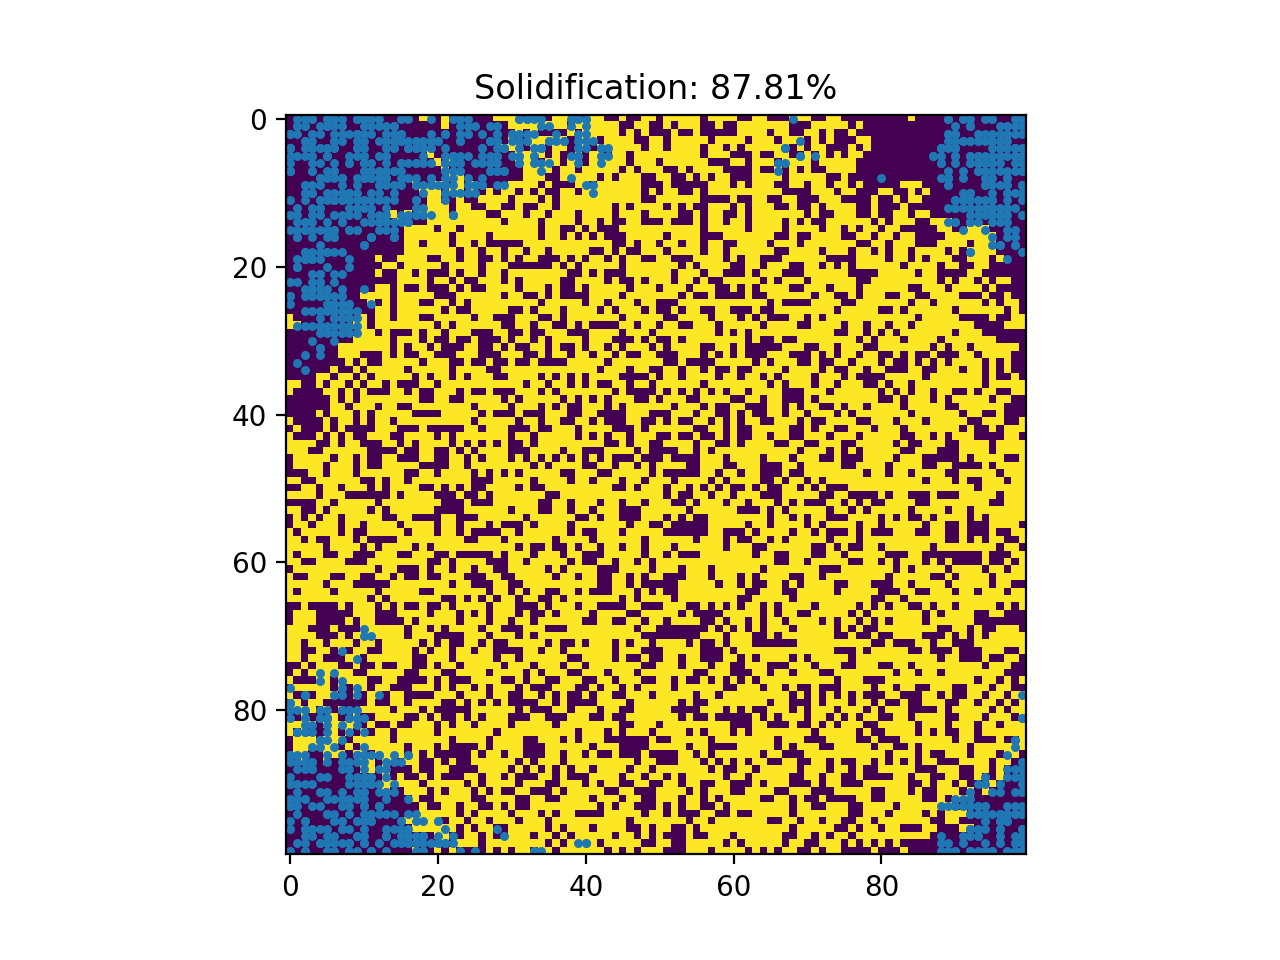

In [24]:
n = 100

plot_grid = np.zeros((n,n))
plot_grid[n//2][n//2] = 1  # Initial solid particle
plot_count = 1

x2plot = np.random.randint(0, n, size=N)
y2plot = np.random.randint(0, n, size=N)

def update2(frame):
    global plot_count, x2plot, y2plot
    if plot_count / 10**4 < 0.8:
        evolve(x2plot, y2plot)
        new, x2plot, y2plot = solidify(x2plot, y2plot, plot_grid)
        plot_count += new
    sc.set_offsets(np.column_stack((x2plot, y2plot)))
    plt.imshow(plot_grid, cmap='viridis')
    plt.title(f'Solidification: {plot_count / (10**4):.2%}')
    return sc

# Create an animation
fig= plt.figure()
sc = plt.scatter(x2plot, y2plot, s=5)
anim = FuncAnimation(fig, update2, frames=10, interval=100)
plt.show()